In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd 
warnings.filterwarnings('ignore')

In [2]:
ID = np.load('data/ZTF_data.npz')['ztf_ID'].tolist()


In [3]:
time_series = np.load('data/ZTF_data.npz', allow_pickle=True)['ztf_time_series_images'].tolist()

In [4]:
print(len(time_series))

65


In [5]:
import sep


def makeCatalog(images, lvl=3):

    bkg = sep.Background(images)
    catalog = sep.extract(images, lvl, err=bkg.globalrms)

    return catalog, bkg

In [6]:
def makeDataFrame(cube_images):
    
    list_bkg = []
    f = 0
    F=0
    
    for i in range(len(cube_images)):
        
        catalog = makeCatalog(cube_images[i])[0]
        bkg = makeCatalog(cube_images[i])[1]


        if i == 0:
            f = pd.DataFrame(catalog)
        else:
            F = pd.DataFrame(catalog)
            f = pd.concat([f, F], ignore_index=True)
            
        list_bkg.append(bkg.globalrms)
    return f, list_bkg
        

In [7]:
data = []
background = []

for i in range(len(time_series)):
    if len(time_series[i])!=0:                        # some time_series lists were empty so I supprim them
        a = makeDataFrame(time_series[i])
        if len(a[0])!=0:                             # in case if there are not sufficient luminosity peak
            data.append(a[0])
            background.append(a[1])

In [8]:
len(data)

63

2 time_series was deleted.

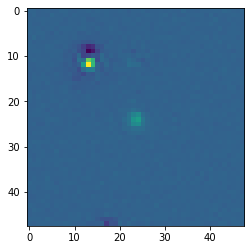

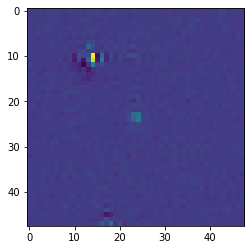

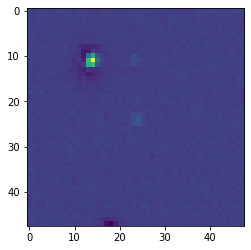

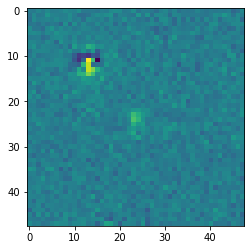

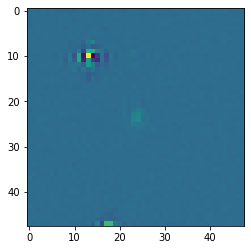

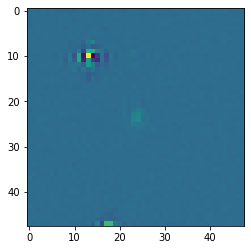

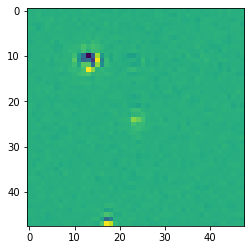

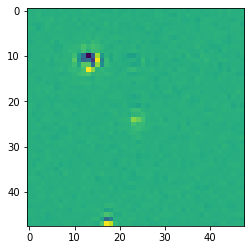

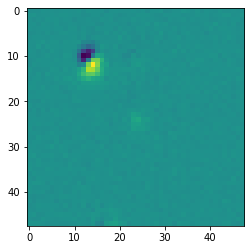

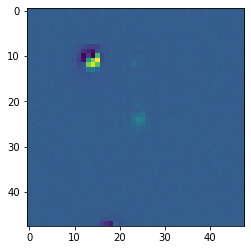

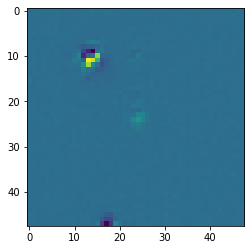

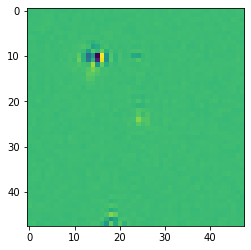

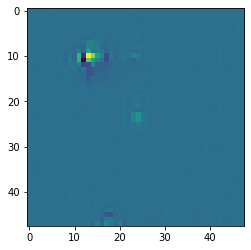

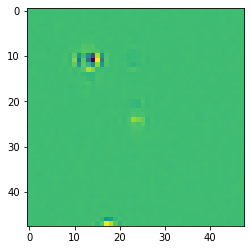

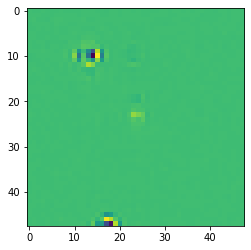

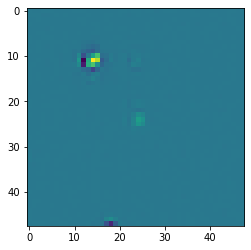

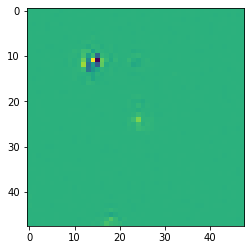

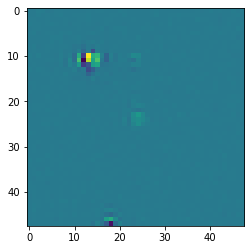

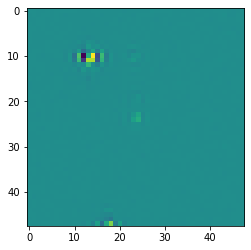

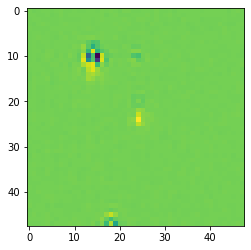

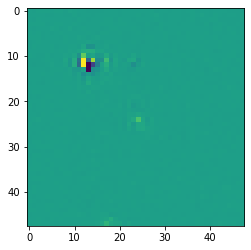

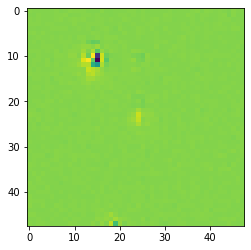

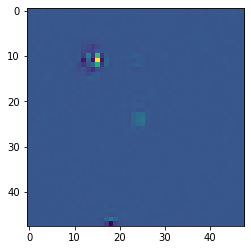

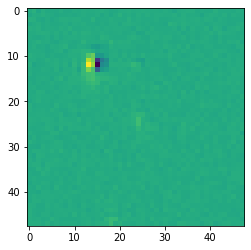

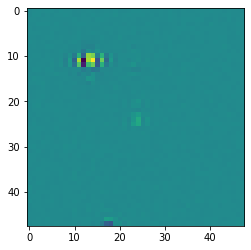

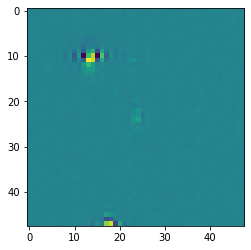

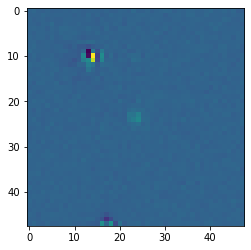

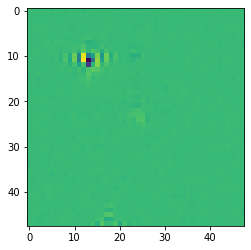

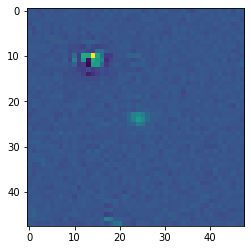

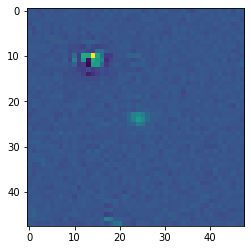

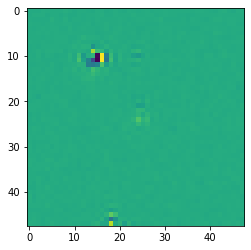

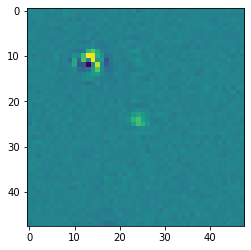

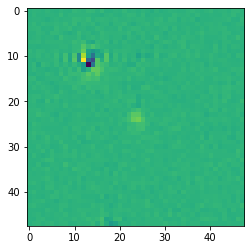

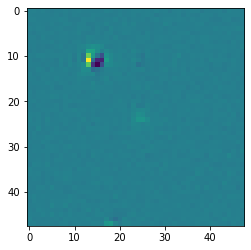

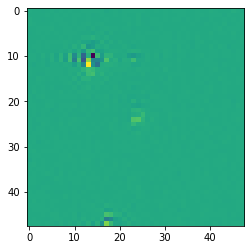

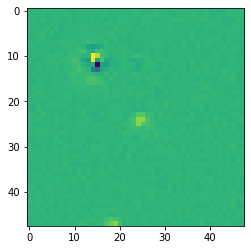

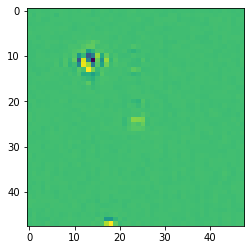

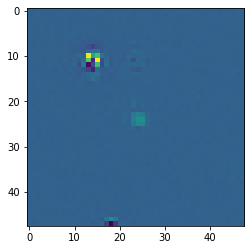

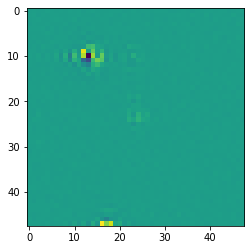

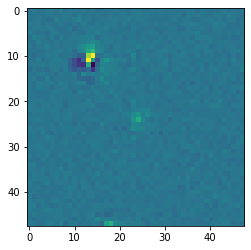

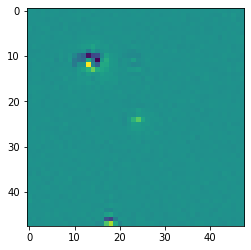

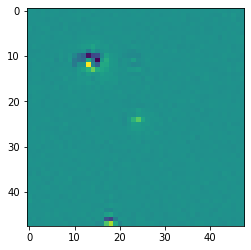

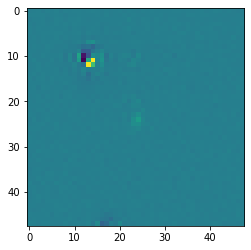

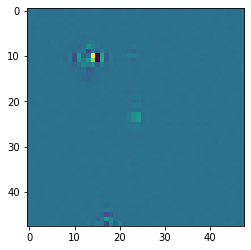

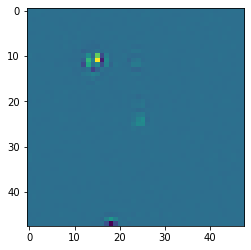

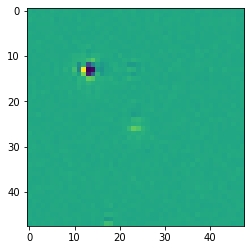

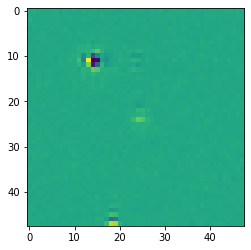

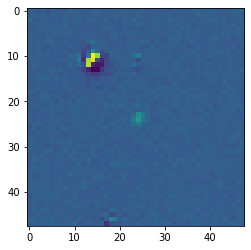

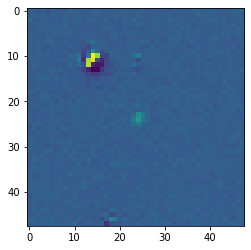

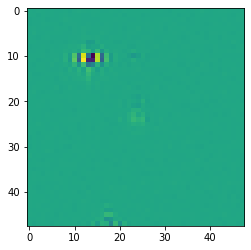

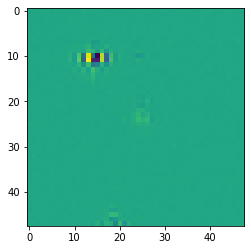

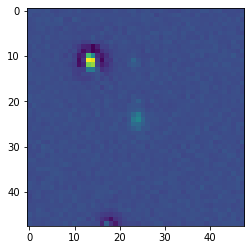

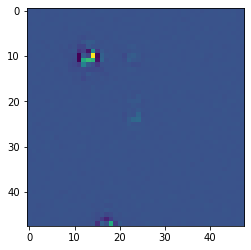

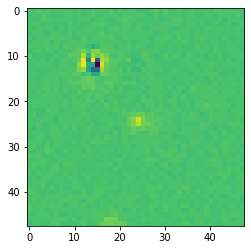

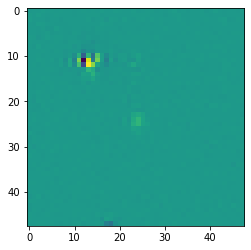

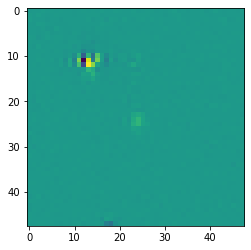

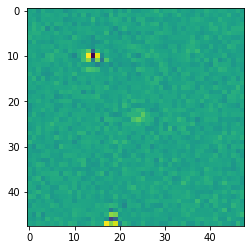

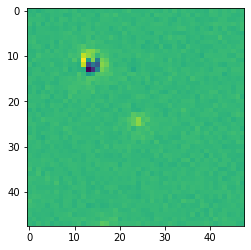

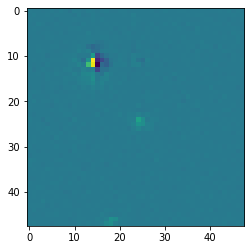

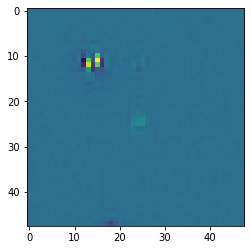

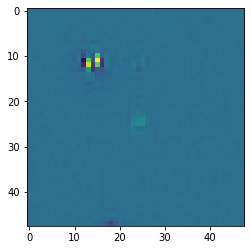

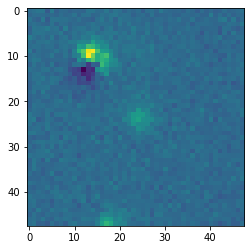

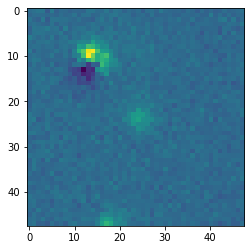

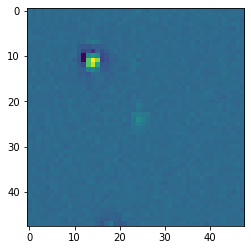

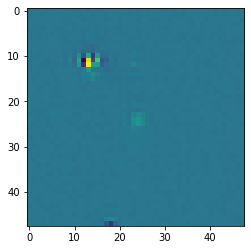

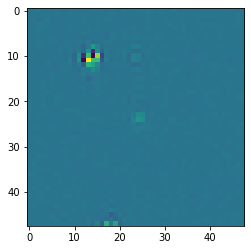

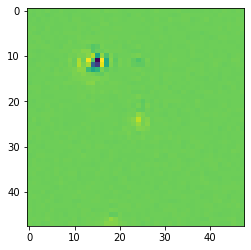

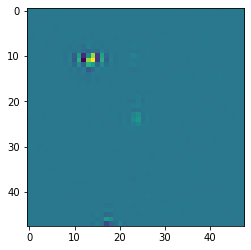

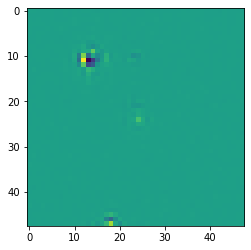

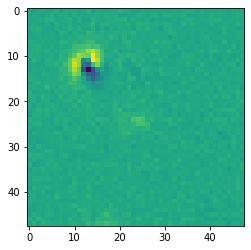

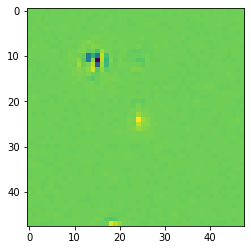

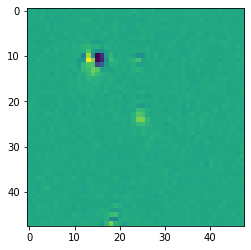

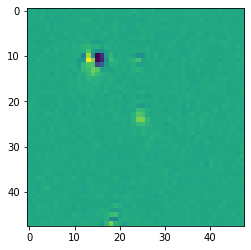

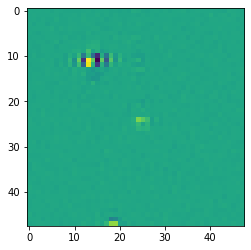

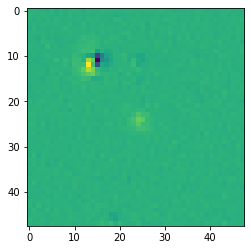

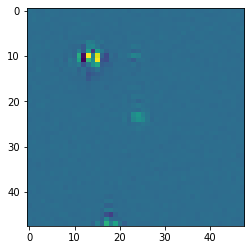

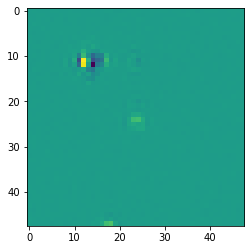

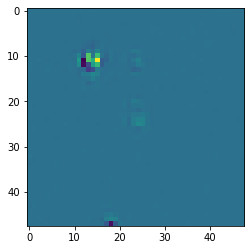

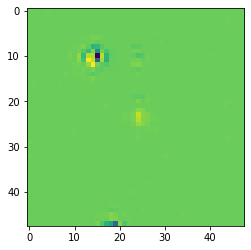

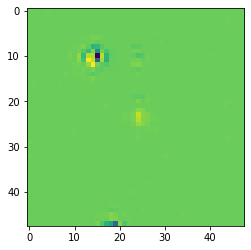

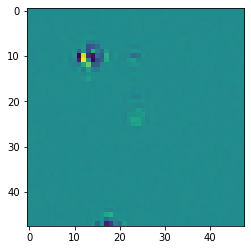

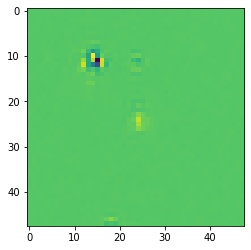

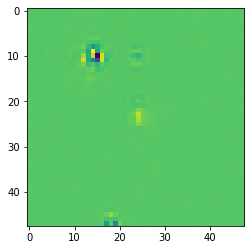

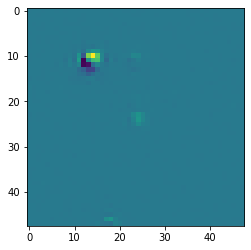

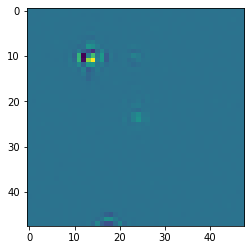

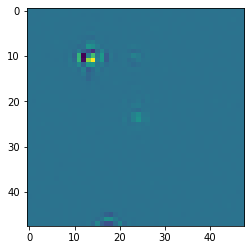

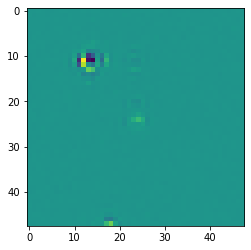

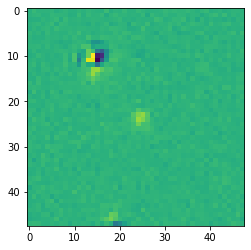

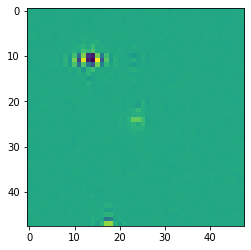

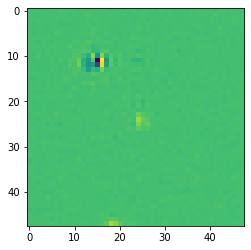

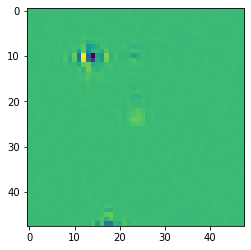

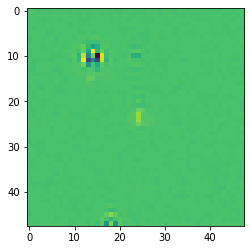

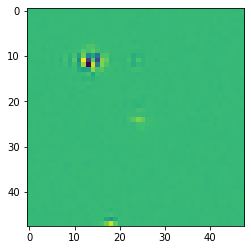

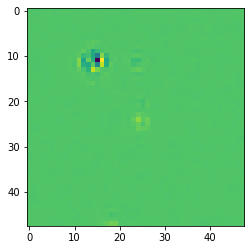

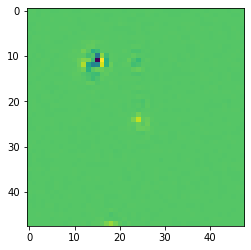

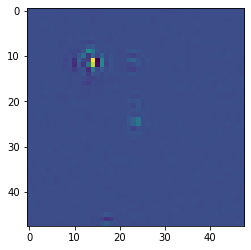

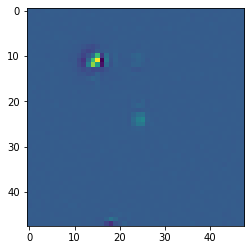

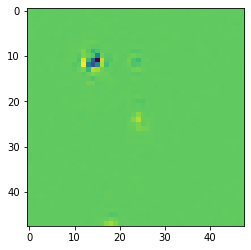

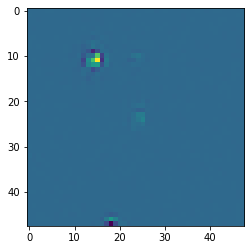

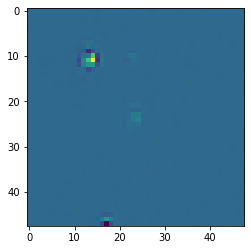

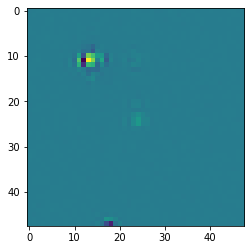

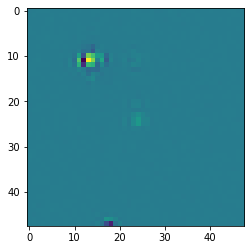

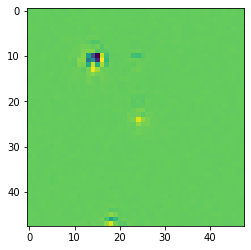

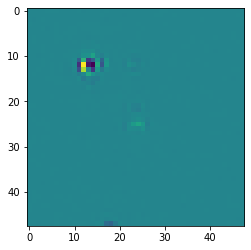

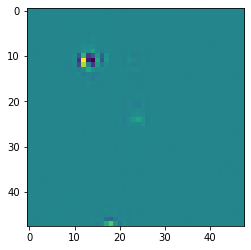

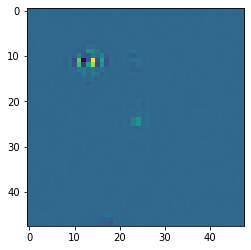

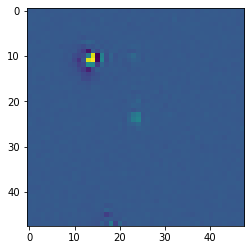

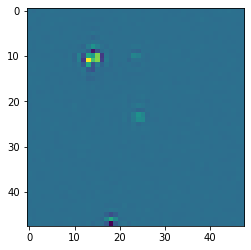

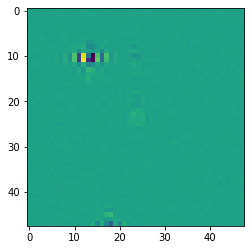

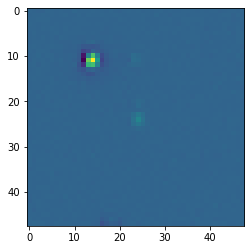

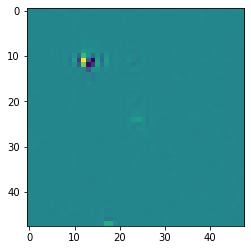

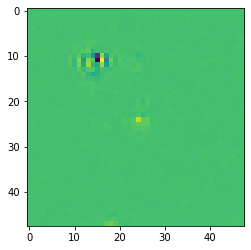

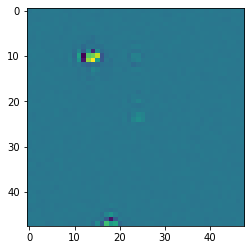

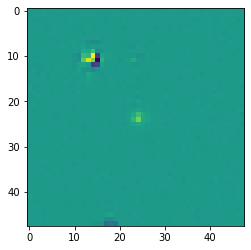

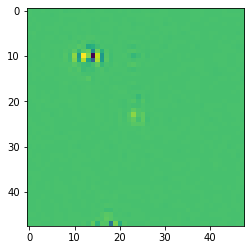

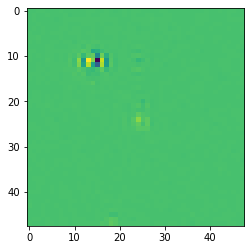

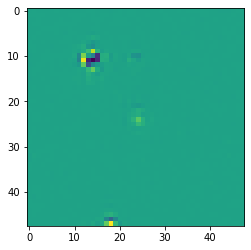

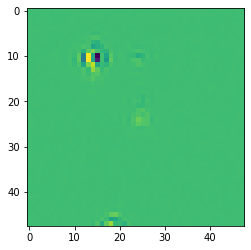

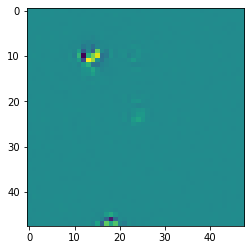

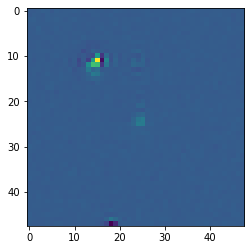

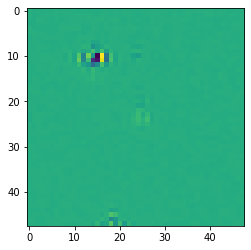

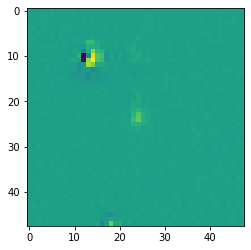

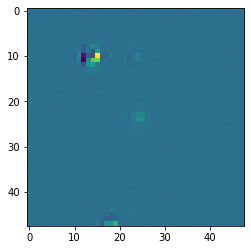

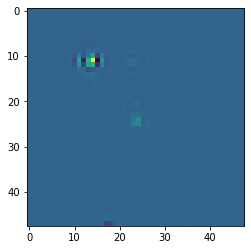

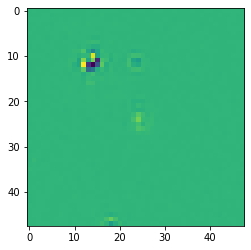

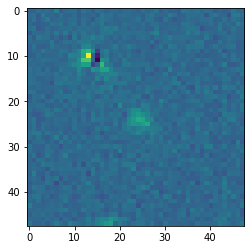

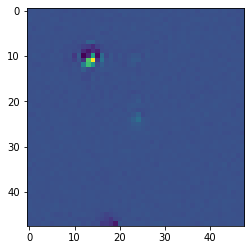

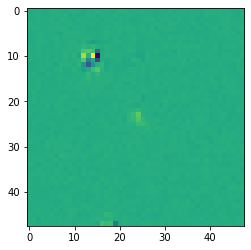

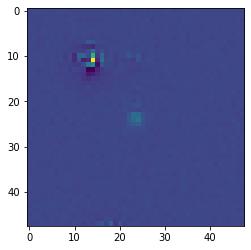

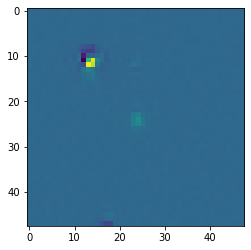

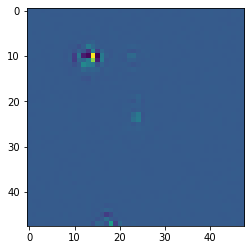

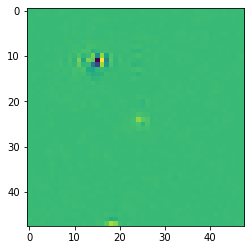

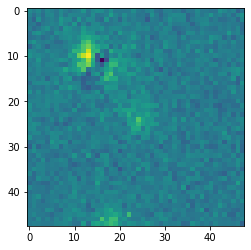

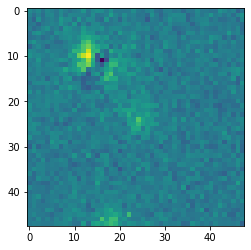

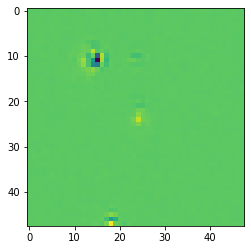

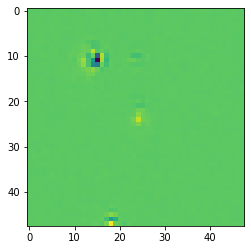

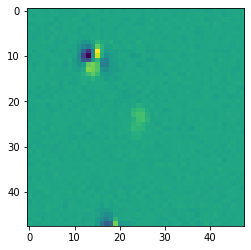

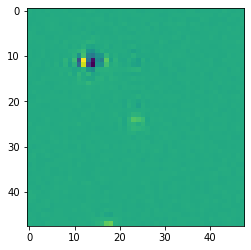

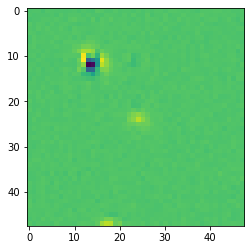

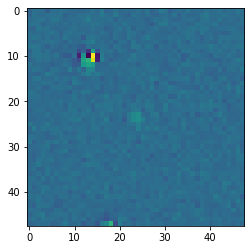

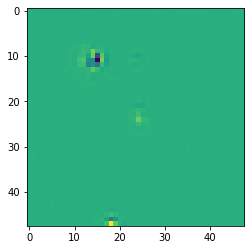

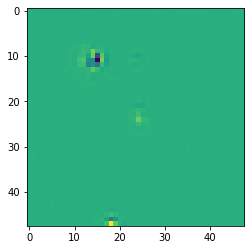

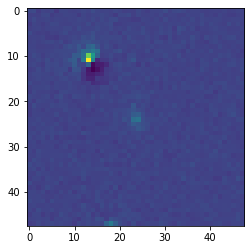

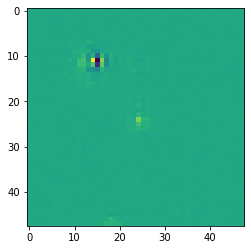

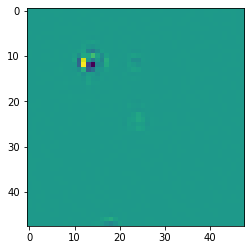

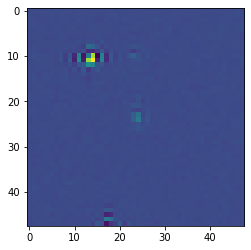

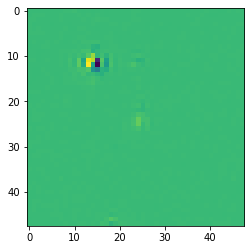

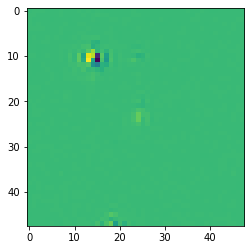

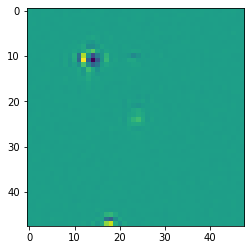

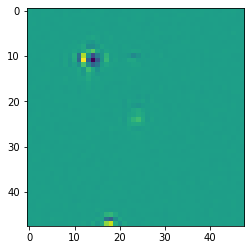

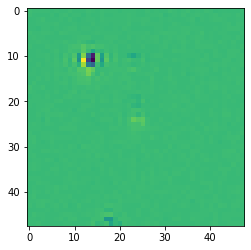

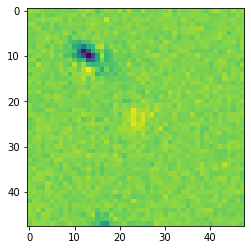

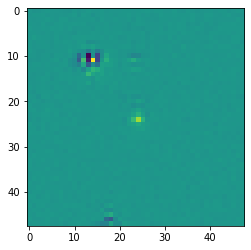

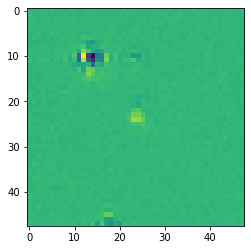

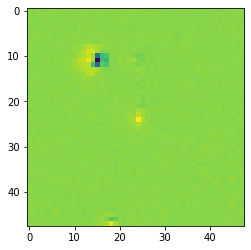

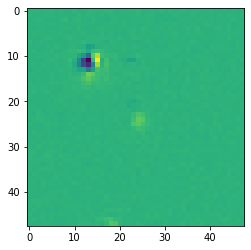

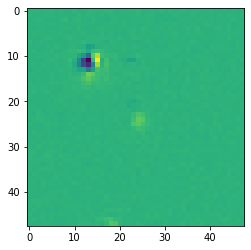

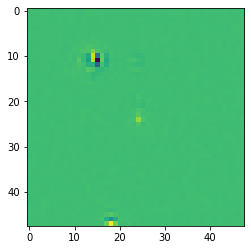

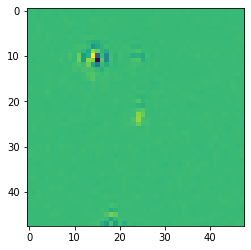

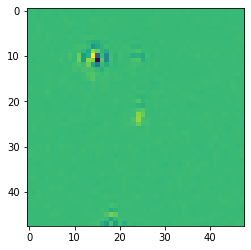

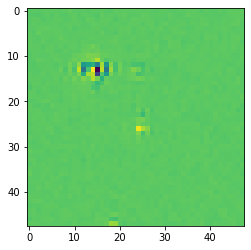

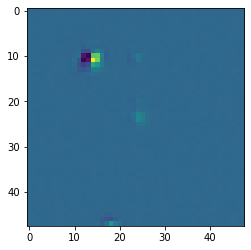

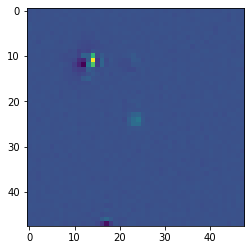

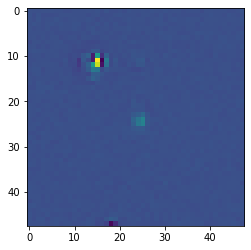

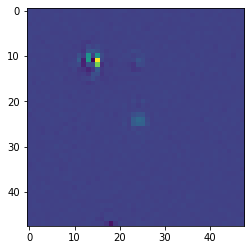

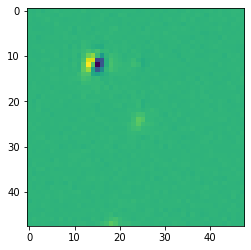

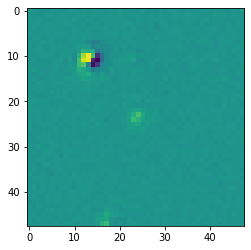

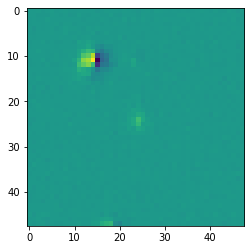

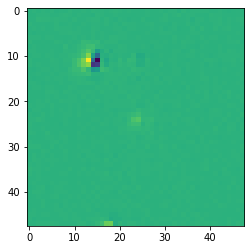

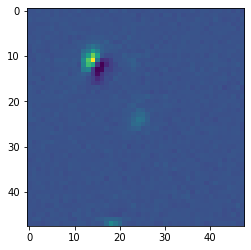

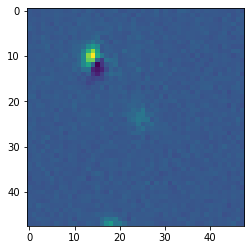

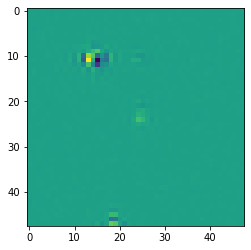

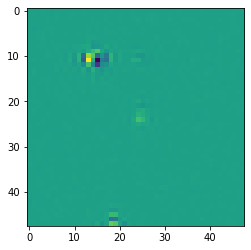

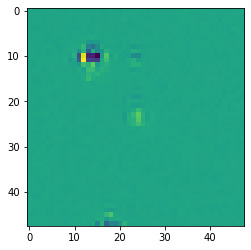

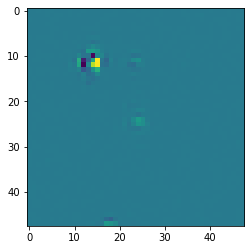

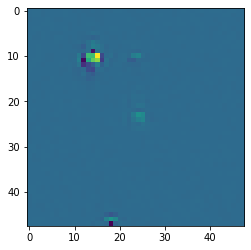

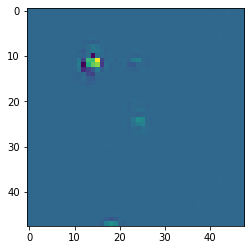

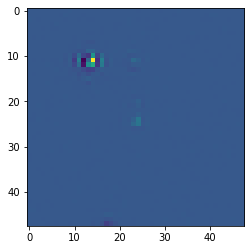

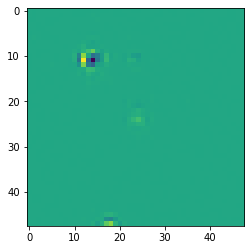

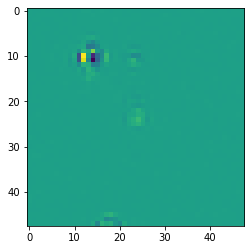

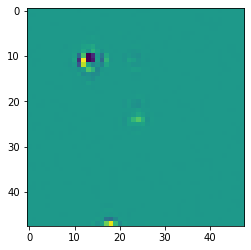

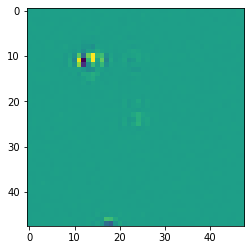

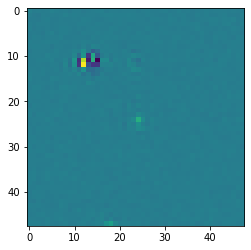

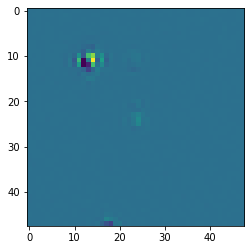

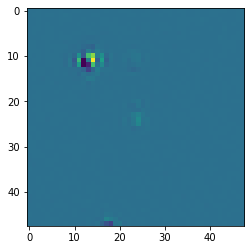

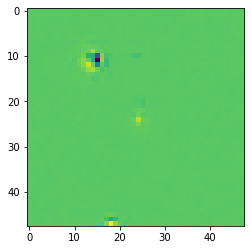

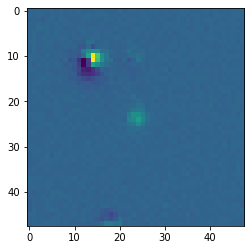

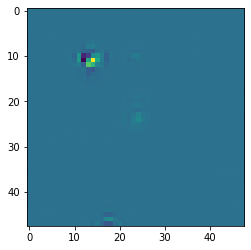

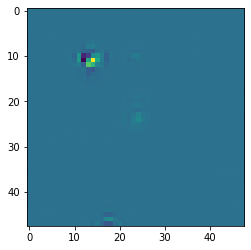

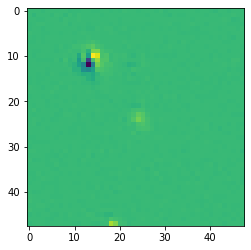

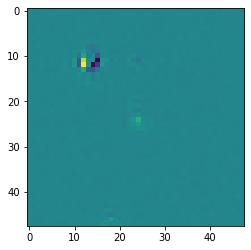

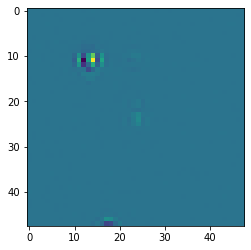

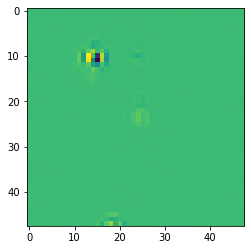

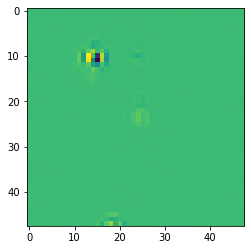

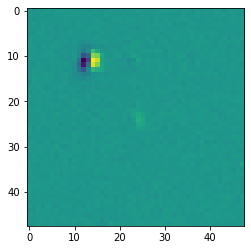

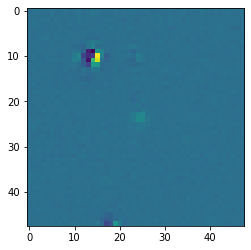

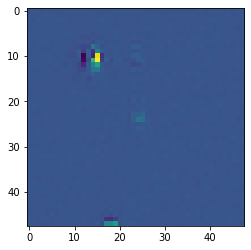

In [46]:
for i in time_series[56]:
    plt.imshow(i)
    plt.show();

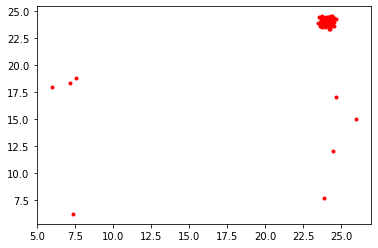

0


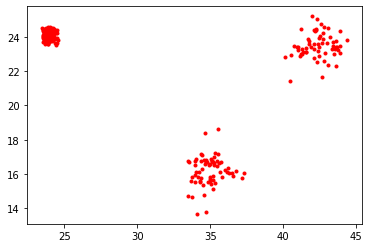

1


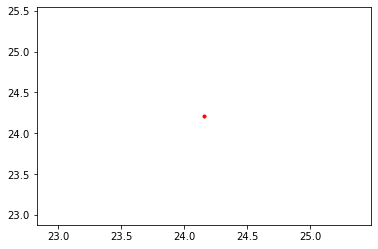

2


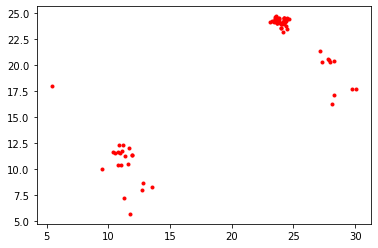

3


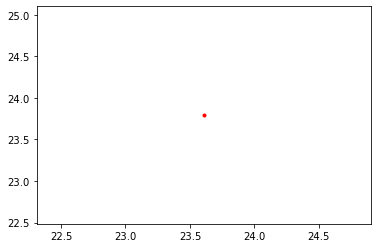

4


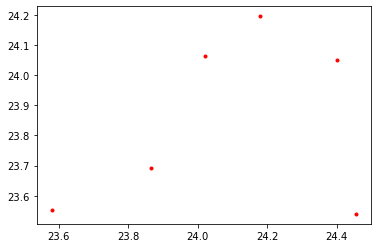

5


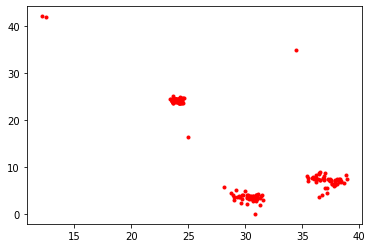

6


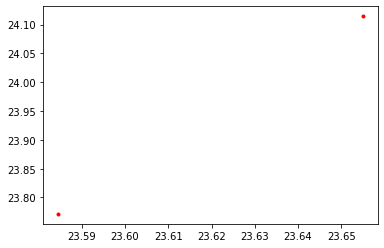

7


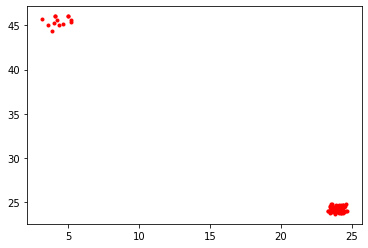

8


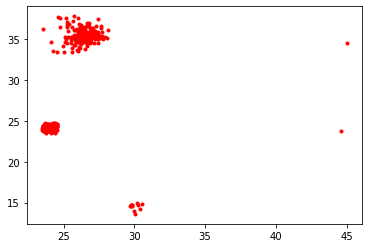

9


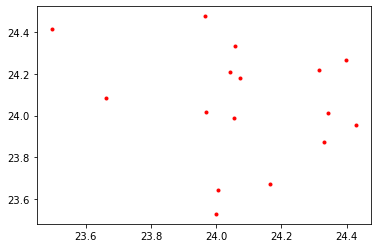

10


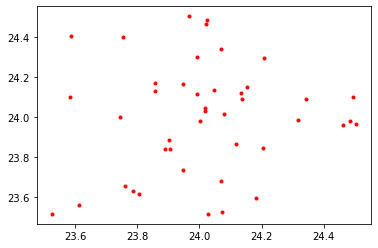

11


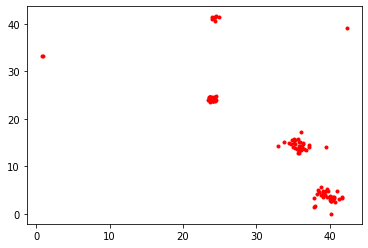

12


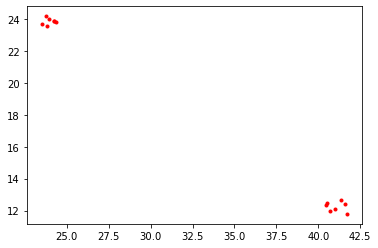

13


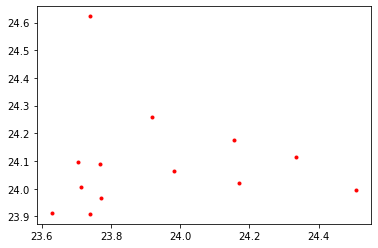

14


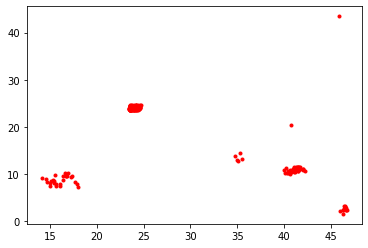

15


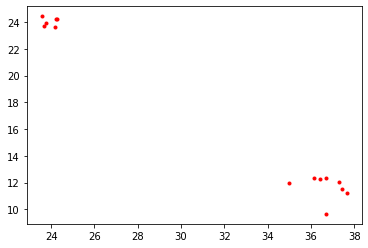

16


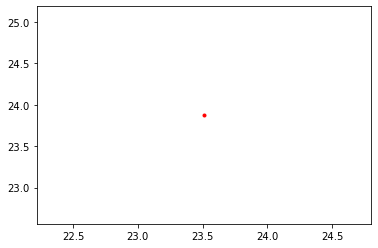

17


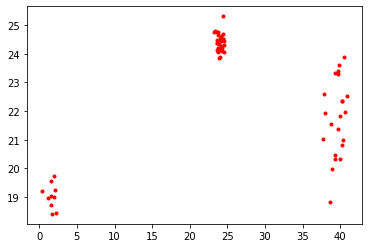

18


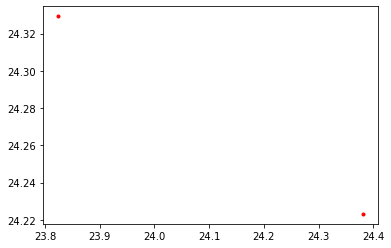

19


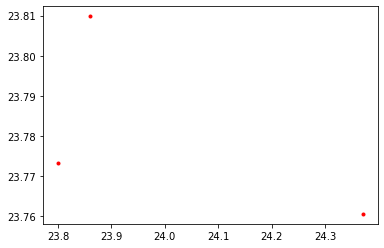

20


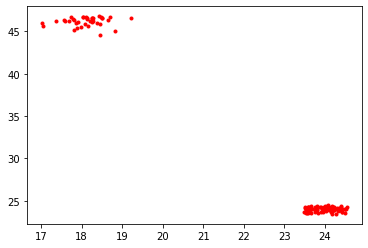

21


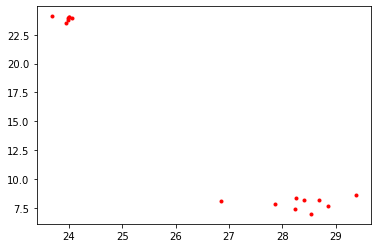

22


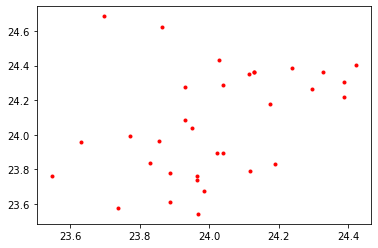

23


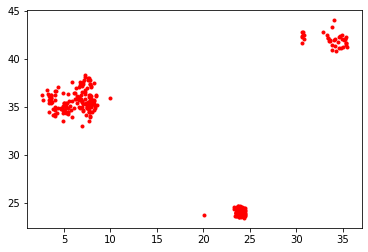

24


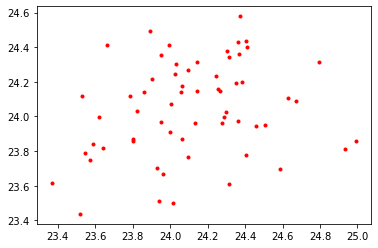

25


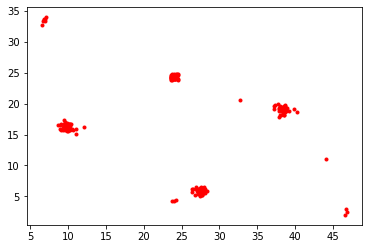

26


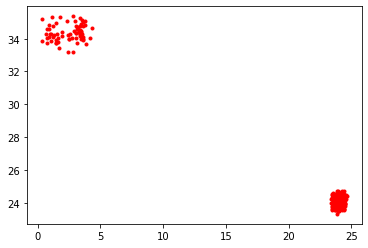

27


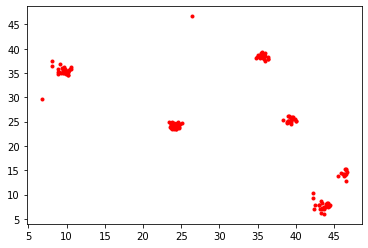

28


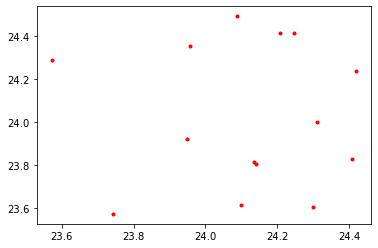

29


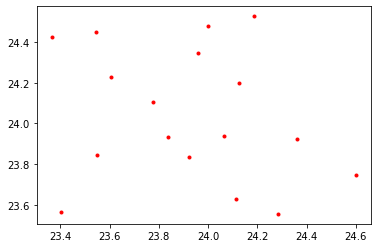

30


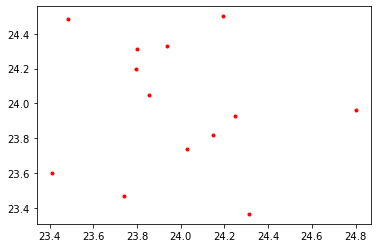

31


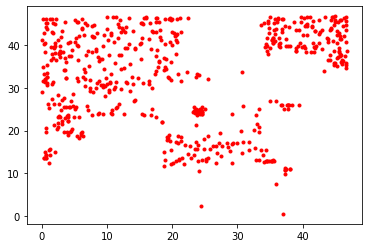

32


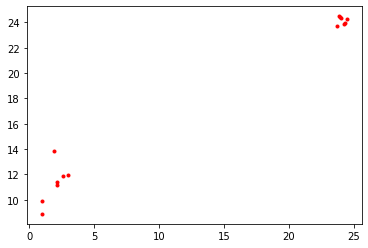

33


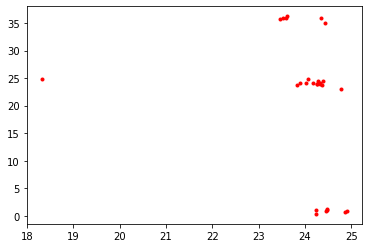

34


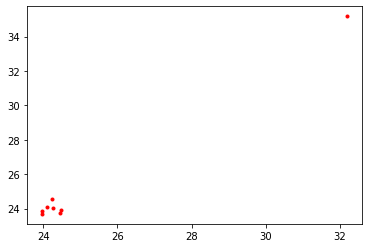

35


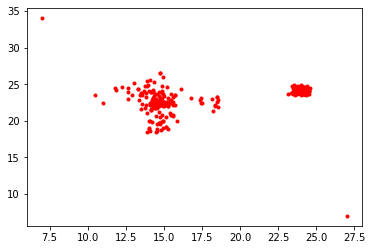

36


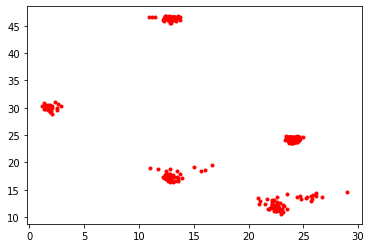

37


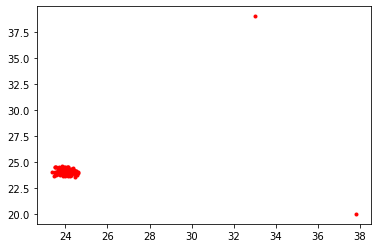

38


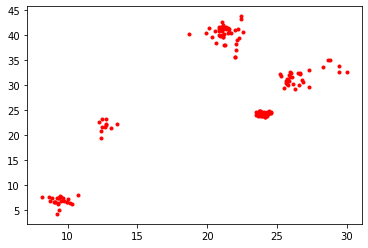

39


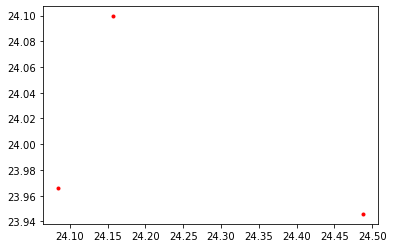

40


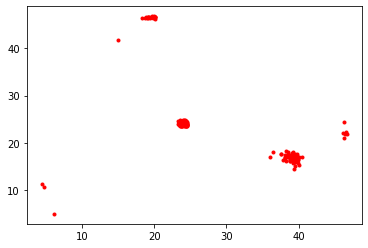

41


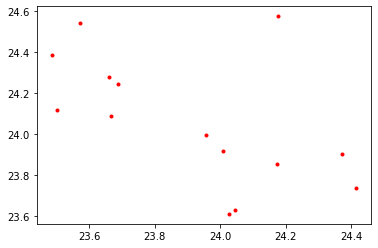

42


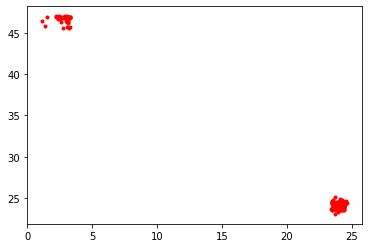

43


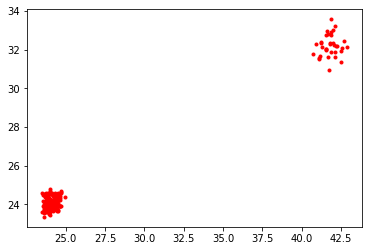

44


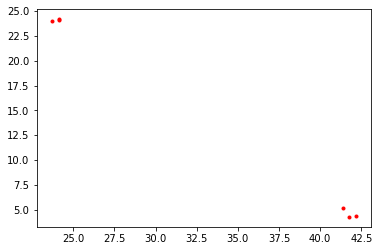

45


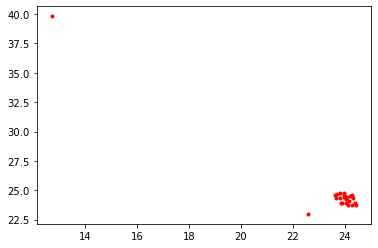

46


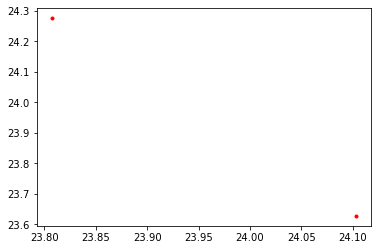

47


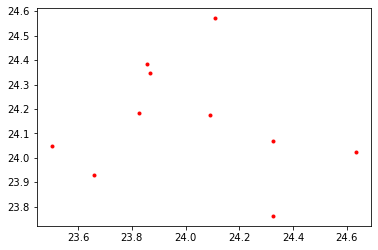

48


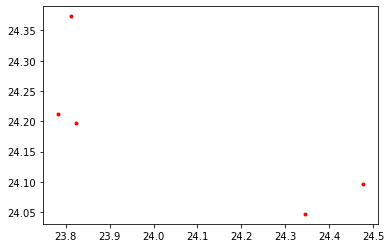

49


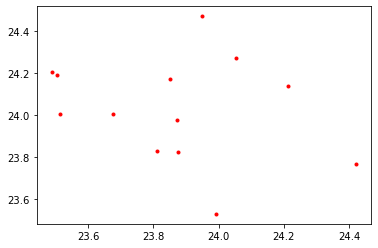

50


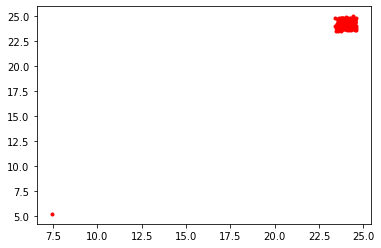

51


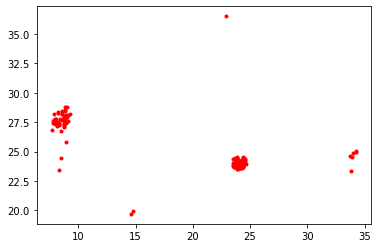

52


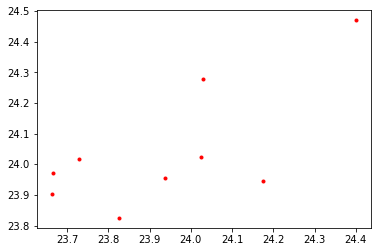

53


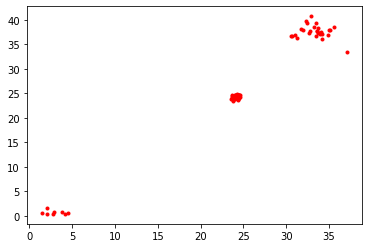

54


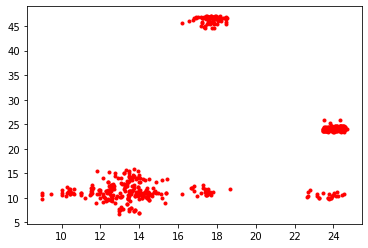

55


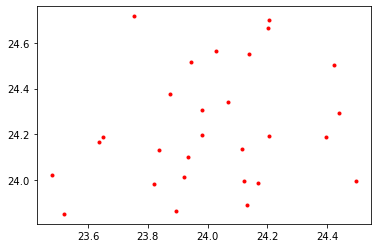

56


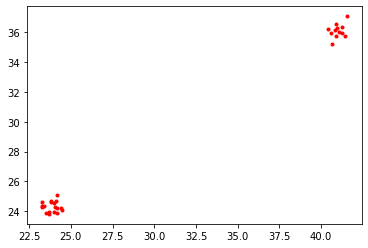

57


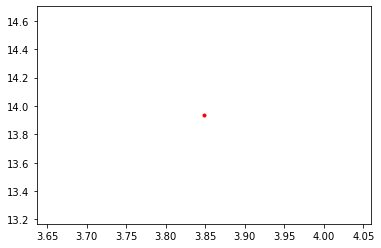

58


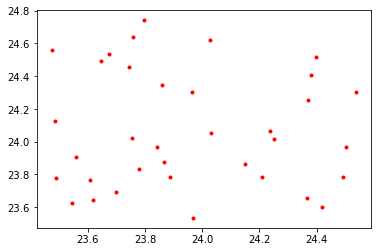

59


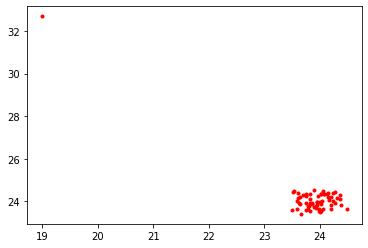

60


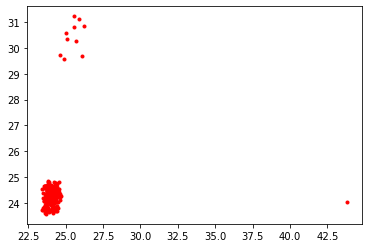

61


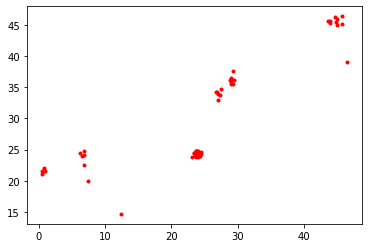

62


In [11]:
for i in range(len(data)):
    plt.plot(data[i]['x'], data[i]['y'], 'r.')
    plt.show();
    print(i)

In [41]:
def cleanLowCpeak(f):
    #mask1 = f['cpeak'] < np.mean(f['cpeak'])*5
    #f = f[mask1]
    mask2 = f['cpeak'] >= np.mean(f['cpeak'])/2 
    
    return f[mask2]

In [42]:
data_cpeak = []
for i in range(len(data)):
    data_cpeak.append(cleanLowCpeak(data[i]))

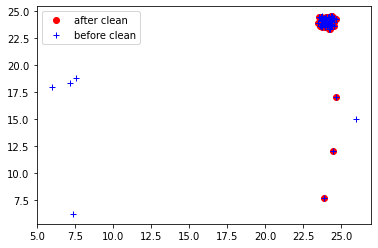

0


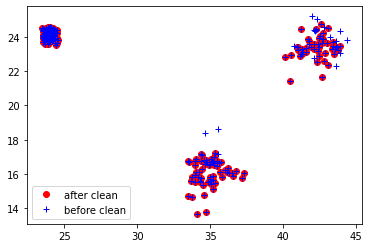

1


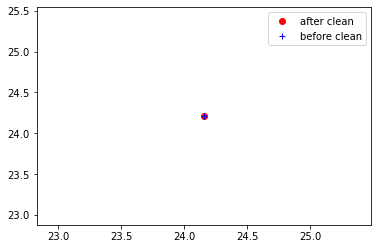

2


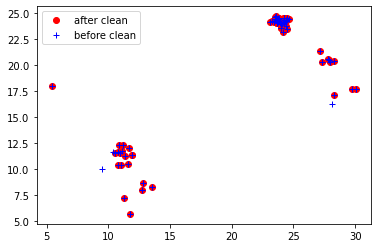

3


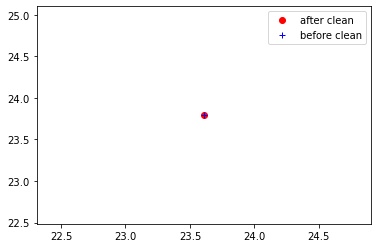

4


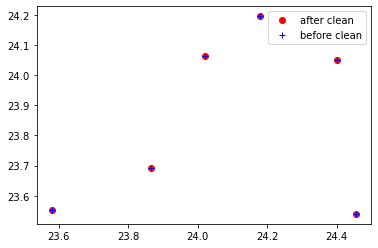

5


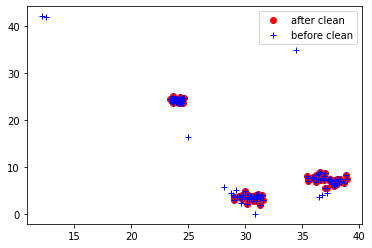

6


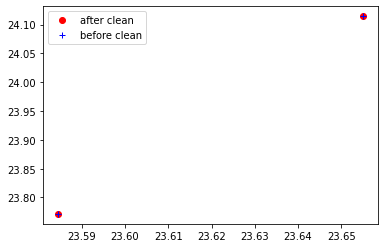

7


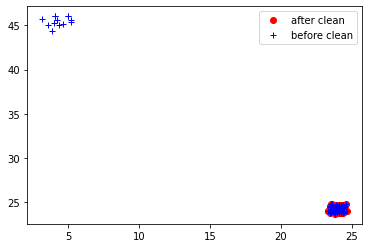

8


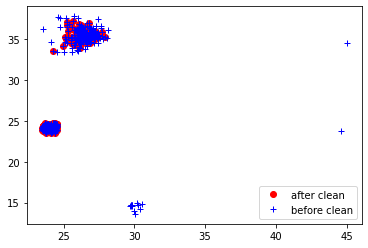

9


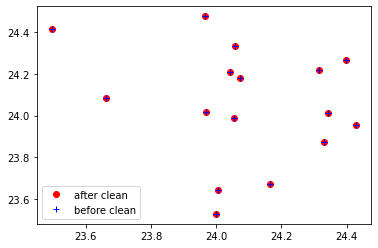

10


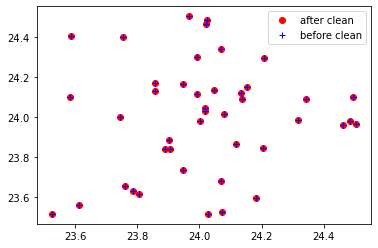

11


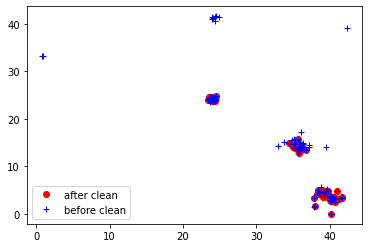

12


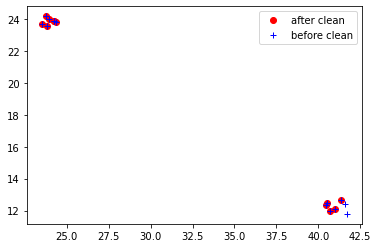

13


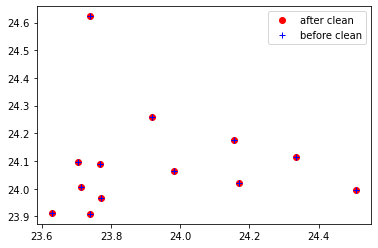

14


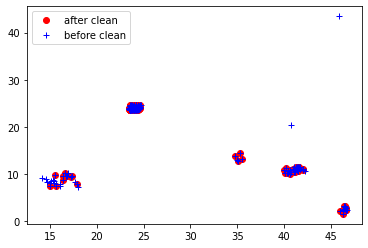

15


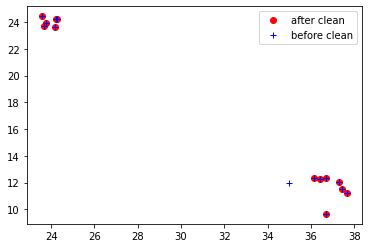

16


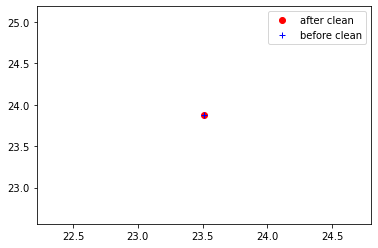

17


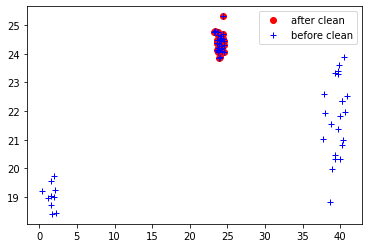

18


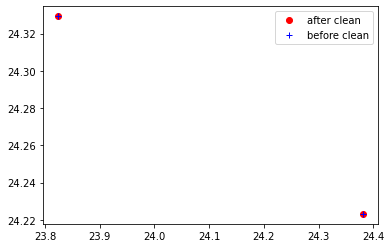

19


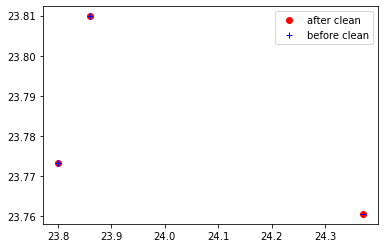

20


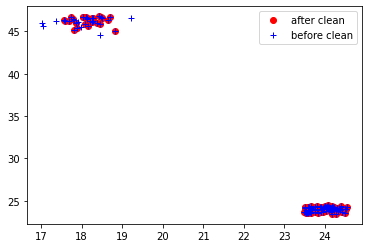

21


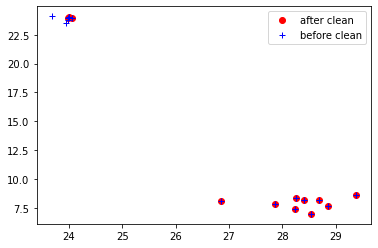

22


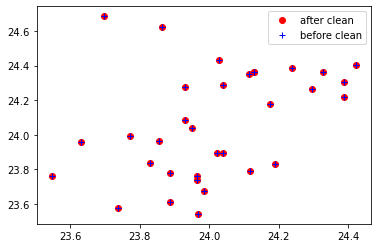

23


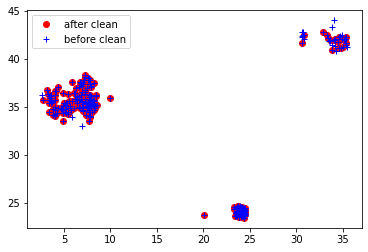

24


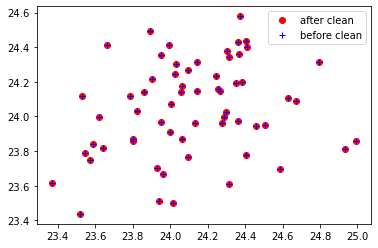

25


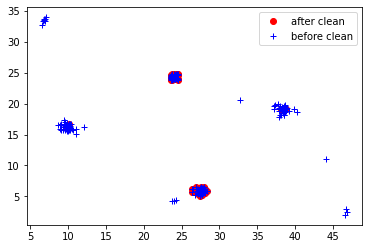

26


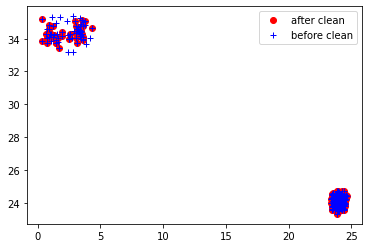

27


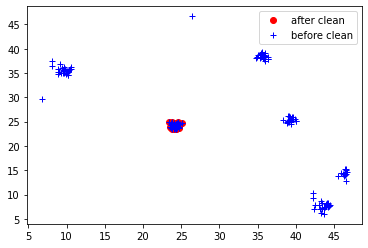

28


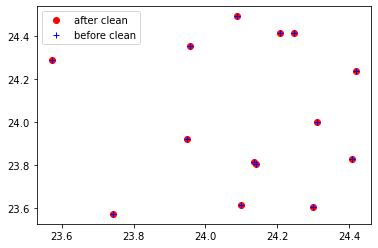

29


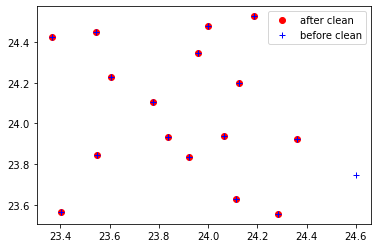

30


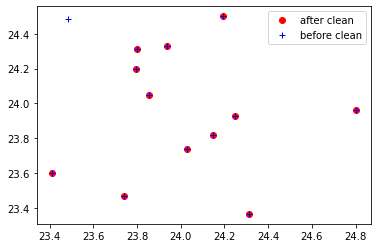

31


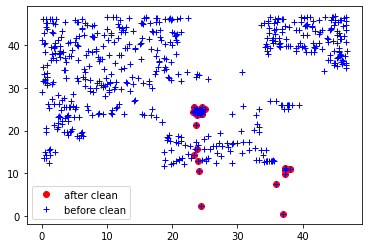

32


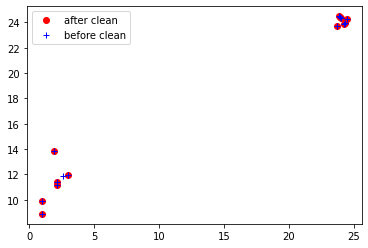

33


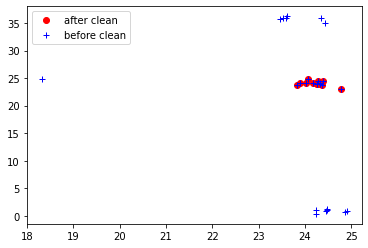

34


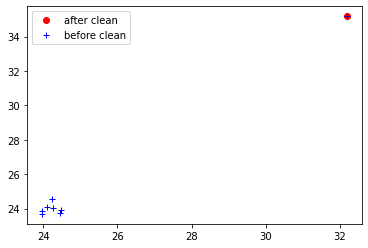

35


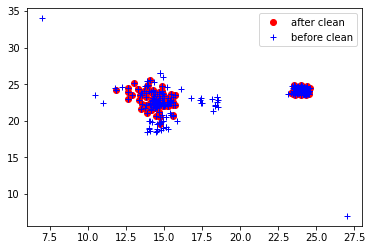

36


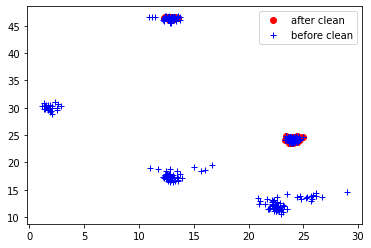

37


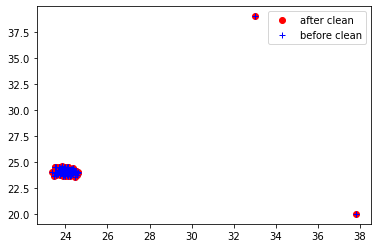

38


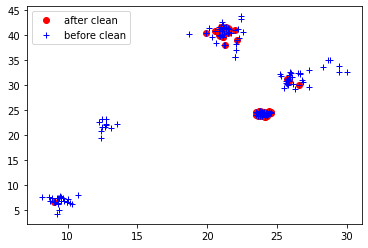

39


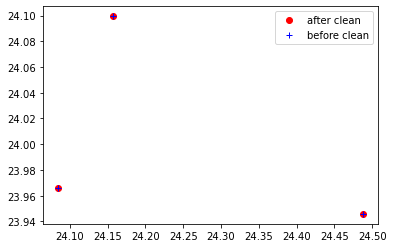

40


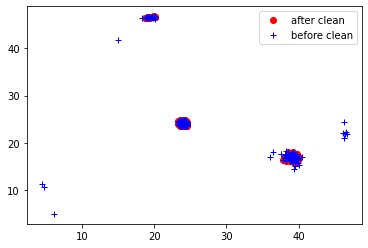

41


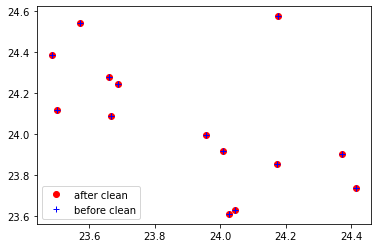

42


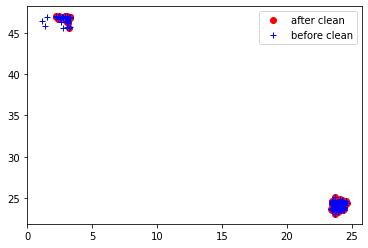

43


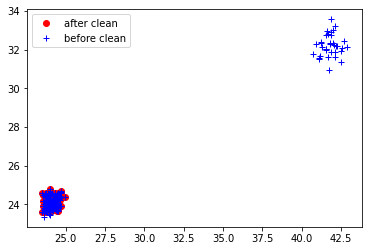

44


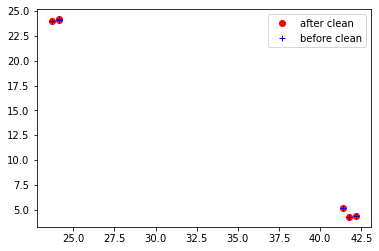

45


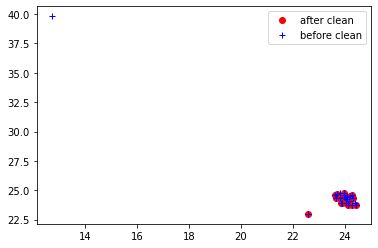

46


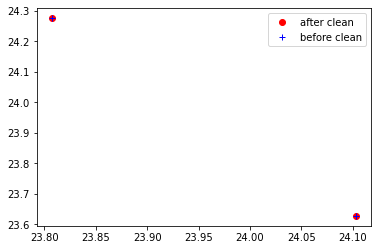

47


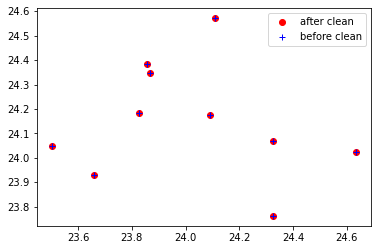

48


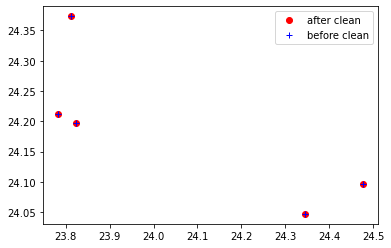

49


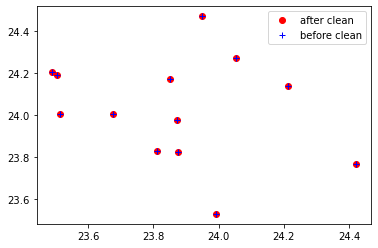

50


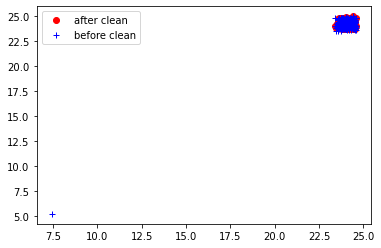

51


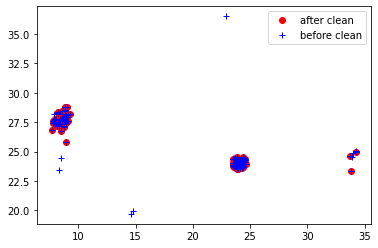

52


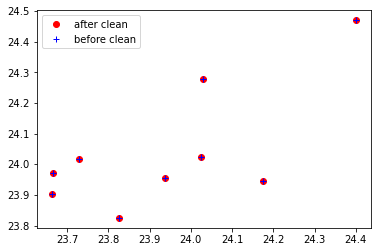

53


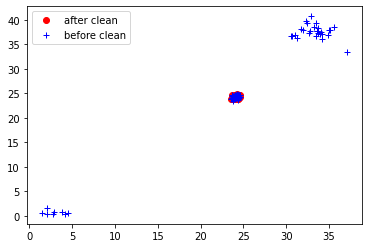

54


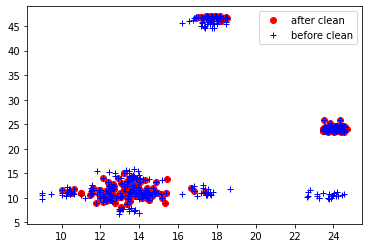

55


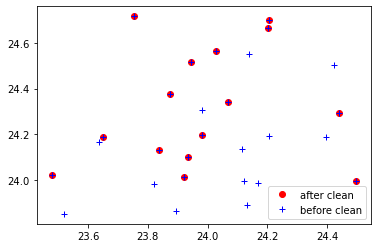

56


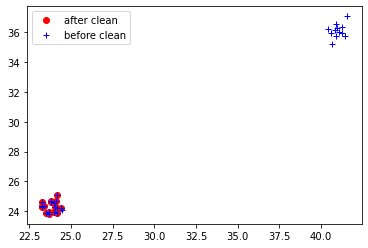

57


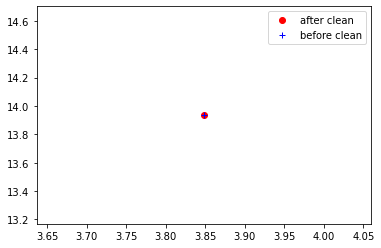

58


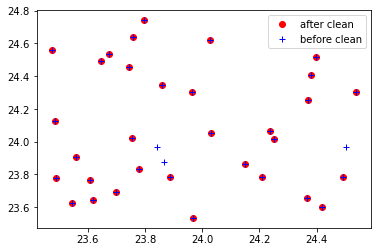

59


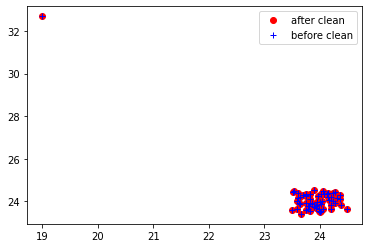

60


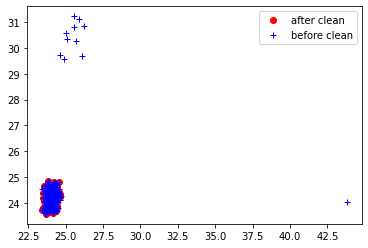

61


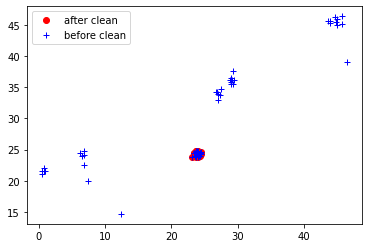

62


In [43]:
for i in range(len(data_cpeak)):
    plt.plot(data_cpeak[i]['x'], data_cpeak[i]['y'], 'ro', label='after clean')
    plt.plot(data[i]['x'], data[i]['y'], 'b+', label='before clean')
    plt.legend()
    plt.show();
    print(i)

In [32]:
data_cpeak[9]

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
0,18.943996,23,17,22,26,22,26,23.994678,23.910413,1.138667,...,0.008403,2307.981201,2431.898682,280.944458,487.745789,24,24,24,24,0
1,18.943996,12,11,24,27,34,37,25.317922,35.321211,0.877241,...,-0.116651,1425.681030,2251.227783,227.749771,695.390808,25,35,25,36,0
2,27.666840,25,17,22,26,22,27,24.132443,24.190314,1.118351,...,-0.068722,3577.323730,3660.449463,444.806305,806.093750,24,24,24,24,0
4,41.630291,21,16,22,26,23,27,23.921901,24.657354,1.014301,...,-0.018407,3573.928711,3801.253662,450.149902,835.621338,24,24,24,24,0
5,74.939560,11,10,22,25,23,26,23.894141,24.081181,0.672944,...,-0.066465,2041.401611,2489.497559,332.738129,641.762207,24,24,24,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,24.005802,37,31,22,27,22,28,24.312359,24.712019,1.486685,...,-0.058968,4482.979980,4620.103027,395.090607,612.601624,24,24,24,24,0
462,23.809069,45,40,21,27,21,28,23.701001,24.669123,2.061207,...,-0.040229,4277.596191,4412.743652,266.222900,353.897949,24,24,24,24,0
464,26.909882,60,54,20,28,21,29,23.725943,24.654101,3.165992,...,0.034807,4283.707031,4383.656738,166.053818,204.419281,24,24,23,24,0
465,25.709438,36,28,22,27,21,27,24.270465,23.858105,1.500394,...,-0.065521,4502.041016,4635.571777,405.891785,606.071411,24,24,24,24,0


In [39]:
a = data_cpeak[9]
print(np.mean(a['cpeak']))
print(np.min(a['cpeak']))
print(np.max(a['cpeak']))

349.0973151736789
145.91250610351562
590.7833251953125


In [23]:
a = data[35]

In [24]:
np.mean(a['cpeak'])

120.23436045646667

In [29]:
data_cpeak[35]

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
0,17.771811,7,7,23,25,23,25,23.976657,23.685627,0.512143,...,-0.114393,170.052979,249.623413,34.170506,49.231468,24,24,24,24,0
1,17.742790,7,7,23,25,23,25,24.264887,24.023685,0.438098,...,-0.041756,174.472687,246.687561,33.926041,47.188820,24,24,25,24,0
2,17.927528,8,8,23,25,23,25,24.098786,24.073466,0.563588,...,0.863364,186.111710,251.923889,29.420574,43.890583,24,24,24,23,0
3,14.748960,8,7,23,25,23,25,23.969172,23.833429,0.537496,...,0.880689,176.577988,232.878113,31.038578,45.197678,24,24,25,23,0
4,14.685991,8,8,23,26,23,25,24.467941,23.913213,0.643694,...,-0.065646,181.103928,243.073120,29.137190,48.902416,24,24,24,23,0
5,14.548588,10,8,23,26,23,25,24.442120,23.749972,0.964713,...,-0.170706,205.183319,261.662476,25.839630,46.461304,24,24,23,23,0
6,25.278240,5,4,23,25,24,25,24.228220,24.559594,0.479284,...,1.952893,188.566162,266.632782,44.360615,83.081879,24,24,24,25,0
